# U.S. Senate Election Analysis

## How Close Have U.S. Senate Elections Been in Georgia From 1976-2020?

This data is contained in the Harvard Dataverse and is maintained by the MIT Election Data and Science Lab (MEDSL). For this analysis, the data was accessed December 2nd, 2023. Raw access to this dataset can be found at https://doi.org/10.7910/DVN/PEJ5QU. \
According to the data codebook: The data file `1976-2018-senate.csv` contains constituency (state-level) returns for elections to the U.S. Senate from 1976 to 2018.  The data source is the document "[Statistics of the Congressional Election](http://history.house.gov/Institution/Election-Statistics/Election-Statistics/)," published biennially by the Clerk of the U.S. House of Representatives. 2018 data comes from official state election websites (in some cases, they are marked as unofficial, and will be updated at a later time). Uncontested races are identified with a vote total of 1.

## 1 - Exploratory Analysis and Data Cleaning

Load packages and import dataframe from `.csv` file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataverse_files/1976-2020-senate.csv')

Before we get into the contents of our data, let us discuss our goals. From our sources, this data contains a vast amount of information about U.S. Senate Elections throughout the country from 1976 to 2020. As a resident of Georgia, I am most interested in the results pertaining to my state only; however, this could be done on a national scale or in a different state.\
The specific question I would like to consider is, pertaining to elections in Georgia, how close have the elections become in more recent years? After all, we have data from about forty years of Senate elections. We should analyze the data with this question in mind -- it will make our analysis much easier.

Let us begin by seeing how our data looks:

In [3]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER


In the above dataframe, we can see our nicely formatted data. We have 19 columns and 3629 rows, which is a respectable amount of data. There are many ways to find the number of rows and columns in our data. One way is to run `df.shape`, which returns a tuple in the order of row count and column count.

Keeping our question in mind, we should be cerebral in our analysis. In most datasets, there will be information that we will not need. Having more than enough information is always better than not having enough; however, the first thing I notice here is our columns. Let us adjust our dataframe to suit our needs a bit better. Columns such as `state_fips`, `state_cen`, 	`state_ic`, and `office` will not be necessary for anything we are doing.\
In fact, we can also remove `state_po` since we already have `state`. Also, we have `party_detailed` and `party_simplified` -- for this analysis, we will keep the simplified version. If you have any doubts about these variables, look in the codebook `codebook-us-senate-1976–2020`.

Before we go off running, let's make sure that the variables we want to keep in place of the ones we want to remove are not null, empty, or have irregular values. We want to remove `state_po`, but keep `state` and remove `party_detailed`, but keep `party_simplified`. Therefore let's ensure there are no missing values for `state` and `party_simplified`.

In [4]:
df.isnull().sum()

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
district              0
stage                 0
special               0
candidate           423
party_detailed      599
writein               0
mode                  0
candidatevotes        0
totalvotes            0
unofficial            0
version               0
party_simplified      0
dtype: int64

Thankfully, we see that `party_detailed` had the issues. Again, consulting the codebook is great for issues like this -- we were informed that many values would be missing since some candidates weren't officially registered in their sources. Note that `candidate` has many missing values as well. We should keep this in mind in the future. With these null values accounted for, we will proceed with our analysis. We have not checked for incorrect values, but we will do that when we condense our data.

In [5]:
# Drop unneccesary columns
df = df.drop(['state_po', 'state_fips', 'state_cen', 'state_ic', 'office', 'party_detailed'], axis=1)

We have dropped all unneccesary columns and replaced our dataframe since we will not need this information for any future analysis. One could argue that we could have removed more columns. This is fair, but it is worth keeping as many variables as we may need in case we want to do future analysis. The variables we removed were practically redundant and would probably serve no purpose in any sort of future analysis. Regardless, with the dataframe adjusted, let us take a look at our dataset:

In [6]:
df.head()

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,statewide,gen,False,SAM STEIGER,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,statewide,gen,False,WM. MATHEWS FEIGHAN,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,statewide,gen,False,DENNIS DECONCINI,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,statewide,gen,False,ALLAN NORWITZ,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,statewide,gen,False,BOB FIELD,False,total,10765,741210,False,20210114,OTHER


Now, it would make sense for us to use `candidatevotes` and `totalvotes` to look at how close these results were. We will use these variables to create a new variable, which will give us the percentage of the total vote -- we will call this new variable `pct_of_vote`.

In [8]:
df["pct_of_vote"] = (df["candidatevotes"] / df["totalvotes"])*100
df.head()

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,pct_of_vote
0,1976,ARIZONA,statewide,gen,False,SAM STEIGER,False,total,321236,741210,False,20210114,REPUBLICAN,43.339404
1,1976,ARIZONA,statewide,gen,False,WM. MATHEWS FEIGHAN,False,total,1565,741210,False,20210114,OTHER,0.211141
2,1976,ARIZONA,statewide,gen,False,DENNIS DECONCINI,False,total,400334,741210,False,20210114,DEMOCRAT,54.010874
3,1976,ARIZONA,statewide,gen,False,ALLAN NORWITZ,False,total,7310,741210,False,20210114,LIBERTARIAN,0.986225
4,1976,ARIZONA,statewide,gen,False,BOB FIELD,False,total,10765,741210,False,20210114,OTHER,1.452355


Looking at the far right of the table, we see we have our new column. What we would like to do now is subset this dataframe into a smaller one. Recall that we are asking about results in Georgian Senate elections; therefore, we will create a *new* dataframe `GAdf` and use it for future analysis.

In [9]:
GAdf = df[df['state'] == "GEORGIA"].reset_index(drop=True)
GAdf.head()

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,pct_of_vote
0,1978,GEORGIA,statewide,gen,False,JOHN W. STOKES,False,total,108808,645128,False,20210114,REPUBLICAN,16.866110
1,1978,GEORGIA,statewide,gen,False,SAM NUNN,False,total,536320,645128,False,20210114,DEMOCRAT,83.133890
2,1980,GEORGIA,statewide,gen,False,HERMAN E. TALMADGE,False,total,776143,1579829,False,20210114,DEMOCRAT,49.128292
3,1980,GEORGIA,statewide,gen,False,MACK MATTINGLY,False,total,803686,1579829,False,20210114,REPUBLICAN,50.871708
4,1984,GEORGIA,statewide,gen,False,MIKE HICKS,False,total,337196,1681344,False,20210114,REPUBLICAN,20.055146


This new dataframe has 88 rows and 14 columns. In this analysis, we will only consider Democrat and Republican candidates. We will take a copy of this dataframe and replace GAdf.

In [10]:
# Keep only candidates that are Democrat or Republican
GAdf = GAdf[(GAdf['party_simplified'] == 'DEMOCRAT') | (GAdf['party_simplified'] == 'REPUBLICAN')].copy()
GAdf.head()

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,pct_of_vote
0,1978,GEORGIA,statewide,gen,False,JOHN W. STOKES,False,total,108808,645128,False,20210114,REPUBLICAN,16.866110
1,1978,GEORGIA,statewide,gen,False,SAM NUNN,False,total,536320,645128,False,20210114,DEMOCRAT,83.133890
2,1980,GEORGIA,statewide,gen,False,HERMAN E. TALMADGE,False,total,776143,1579829,False,20210114,DEMOCRAT,49.128292
3,1980,GEORGIA,statewide,gen,False,MACK MATTINGLY,False,total,803686,1579829,False,20210114,REPUBLICAN,50.871708
4,1984,GEORGIA,statewide,gen,False,MIKE HICKS,False,total,337196,1681344,False,20210114,REPUBLICAN,20.055146


With the removal of third-party candidates, we now have 52 rows. It is important not to gloss over the reason I am removing those observations rather haphazardly. In the state of Georgia, general elections since 1976 have been between Republicans and Democrats -- this is the reason we can drop all third-party candidates; however, for states like Vermont, Bernie Sanders ran as an Independent and won. Take a look:

In [13]:
df.query('candidate == "BERNARD SANDERS" or candidate == "BERNIE SANDERS"')

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,pct_of_vote
2260,2006,VERMONT,statewide,gen,False,BERNARD SANDERS,False,total,171638,262419,False,20210114,OTHER,65.406087
2839,2012,VERMONT,statewide,gen,False,BERNARD SANDERS,False,total,207848,292762,False,20210114,OTHER,70.995553
3401,2018,VERMONT,statewide,gen,False,BERNIE SANDERS,False,total,183529,272624,False,20210114,OTHER,67.319458


We can see here that Senator Sanders has participated in, and won, three elections for U.S. Senate in Vermont since 2006 while running as an Independent. Therefore, it would be incorrect to drop third-party candidates if this analysis was done in Vermont *or* another state with a similar instance.

In [42]:
df[(df['year'] == 2000) & (df['state'] == 'GEORGIA')]

"""
This election was a non-partisan election due to it being a special election. 
Each candidate ran without a party. 
Mack Mattingly would have ran as a Republican if given the option.
"""

,year,state,district,stage,special,candidate,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,pct_of_vote
1659,2000,GEORGIA,statewide,gen,True,MACK F. MATTINGLY,False,total,920478,2415743,False,20210114,OTHER,38.103308
1660,2000,GEORGIA,statewide,gen,True,PAUL ROBERT MACGREGOR,False,total,25942,2415743,False,20210114,OTHER,1.073873
1661,2000,GEORGIA,statewide,gen,True,BEN BALLENGER,False,total,22975,2415743,False,20210114,OTHER,0.951053
1662,2000,GEORGIA,statewide,gen,True,JEFF GATES,False,total,21249,2415743,False,20210114,OTHER,0.879605
1663,2000,GEORGIA,statewide,gen,True,ZELL MILLER,False,total,1413224,2415743,False,20210114,DEMOCRAT,58.500594
1664,2000,GEORGIA,statewide,gen,True,WINNIE WALSH,False,total,11875,2415743,False,20210114,OTHER,0.491567


In [113]:
# Georgia had a special election from 2020-2021, which resulted in a runoff between Warnock and Loeffler.
# We will only consider Perdue v. Ossoff and Warnock v. Loeffler in 2021.
GAdf = GAdf[GAdf['year'] != 2020].copy()

In [114]:
# Missing an observation from the 2000 election.
# Data gathered manually from page 17: https://clerk.house.gov/member_info/electionInfo/2000election.pdf
new_row = {
    'year': 2000,
    'state': 'GEORGIA',
    'district': 'statewide',
    'stage': 'gen',
    'special': True,
    'candidate': 'MACK MATTINGLY',
    'writein': 'False',
    'mode': 'total',
    'candidatevotes': 920478,
    'totalvotes': 2415743,
    'unofficial': False,
    'version': 20231204,
    'party_simplified': 'REPUBLICAN',
    'pct_of_vote': 38.103308174
}
new_df = pd.DataFrame([new_row])
GAdf = pd.concat([GAdf, new_df], ignore_index=True)
GAdf = GAdf.sort_values(by='year').reset_index(drop=True)

In [115]:
# Drop rows that were not runoffs
rows_to_drop = [10, 11]
GAdf.drop(rows_to_drop, inplace=True)

In [116]:
# Drop rows that were not runoffs
rows_to_drop = [25, 26]
GAdf.drop(rows_to_drop, inplace=True)

In [117]:
# Create dataframe without 2021 election.
GAdf_no2021 = GAdf[GAdf['year'] != 2021]

In [118]:
GAdf.reset_index(drop=True, inplace=True)

In [119]:
# Group by 'year' and find the maximum votes for each year.
max_votes_by_year = GAdf_no2021.groupby('year')['candidatevotes'].max().reset_index()
max_votes_by_year.columns = ['year', 'max_votes_by_year']
GAdf_no2021 = pd.merge(GAdf_no2021, max_votes_by_year, on='year', how='left')

In [120]:
GAdf_no2021['is_winner'] = GAdf_no2021['max_votes_by_year'] == GAdf_no2021['candidatevotes']

## Create Line Graphs

([<matplotlib.axis.YTick at 0x1bc23e11a10>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45'),
  Text(0, 50, '50'),
  Text(0, 55, '55'),
  Text(0, 60, '60'),
  Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100')])

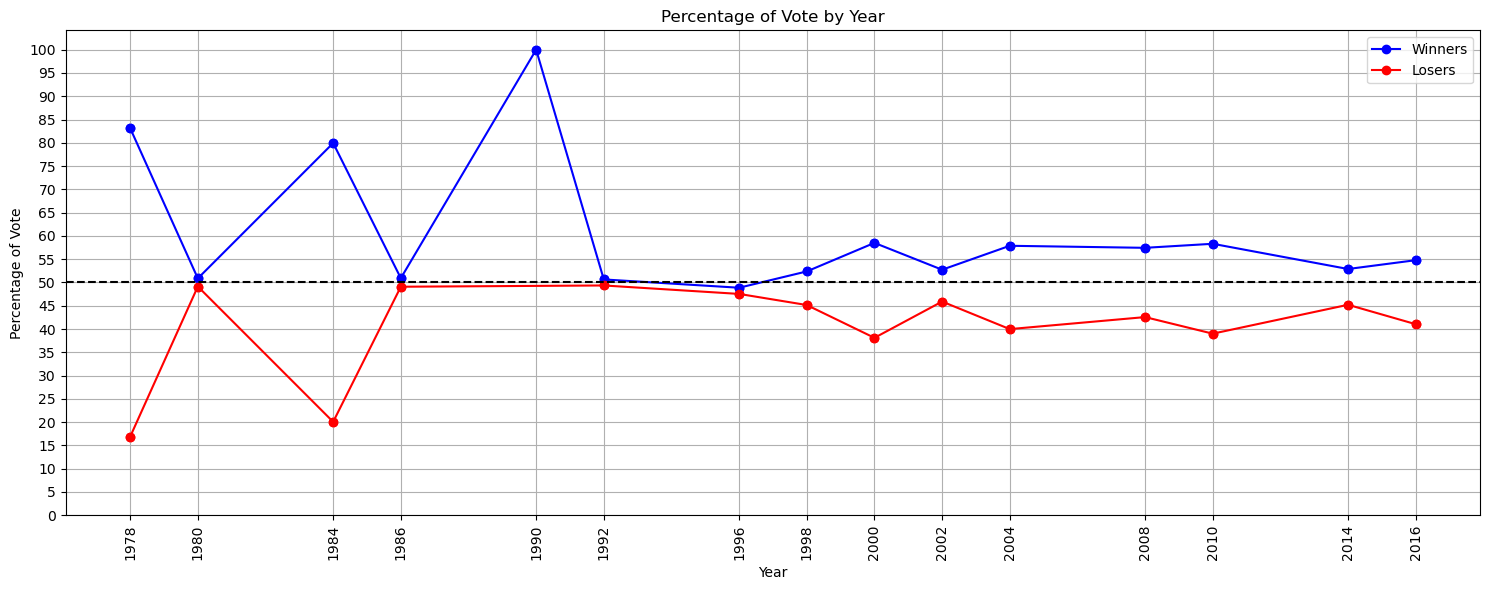

In [145]:
# Separate data for winners and losers
winners = GAdf_no2021[GAdf_no2021['is_winner'] == True]
losers = GAdf_no2021[GAdf_no2021['is_winner'] == False]

# Plotting the graph
plt.figure(figsize=(15, 6))

# Plot lines for winners in blue
plt.plot(winners['year'], winners['pct_of_vote'], marker='o', linestyle='-', color='blue', label='Winners')

# Plot lines for losers in red
plt.plot(losers['year'], losers['pct_of_vote'], marker='o', linestyle='-', color='red', label='Losers')

# Plot winners' data points in blue
plt.scatter(winners['year'], winners['pct_of_vote'], color='blue')

# Plot losers' data points in red
plt.scatter(losers['year'], losers['pct_of_vote'], color='red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Vote')
plt.title('Percentage of Vote by Year')

# Show legend
plt.legend()

# Set x-axis ticks to display every year and rotate the labels
plt.xticks(GAdf_no2021['year'].unique(), rotation='vertical')

# Evenly space the x-axis
plt.tight_layout()

# Show the plot
plt.grid(True)

# Adding a black dashed line at y=50
plt.axhline(y=50, color='black', linestyle='--')

# Setting y-axis ticks to count by 10s
plt.yticks(range(0, 101, 5))

#plt.show()

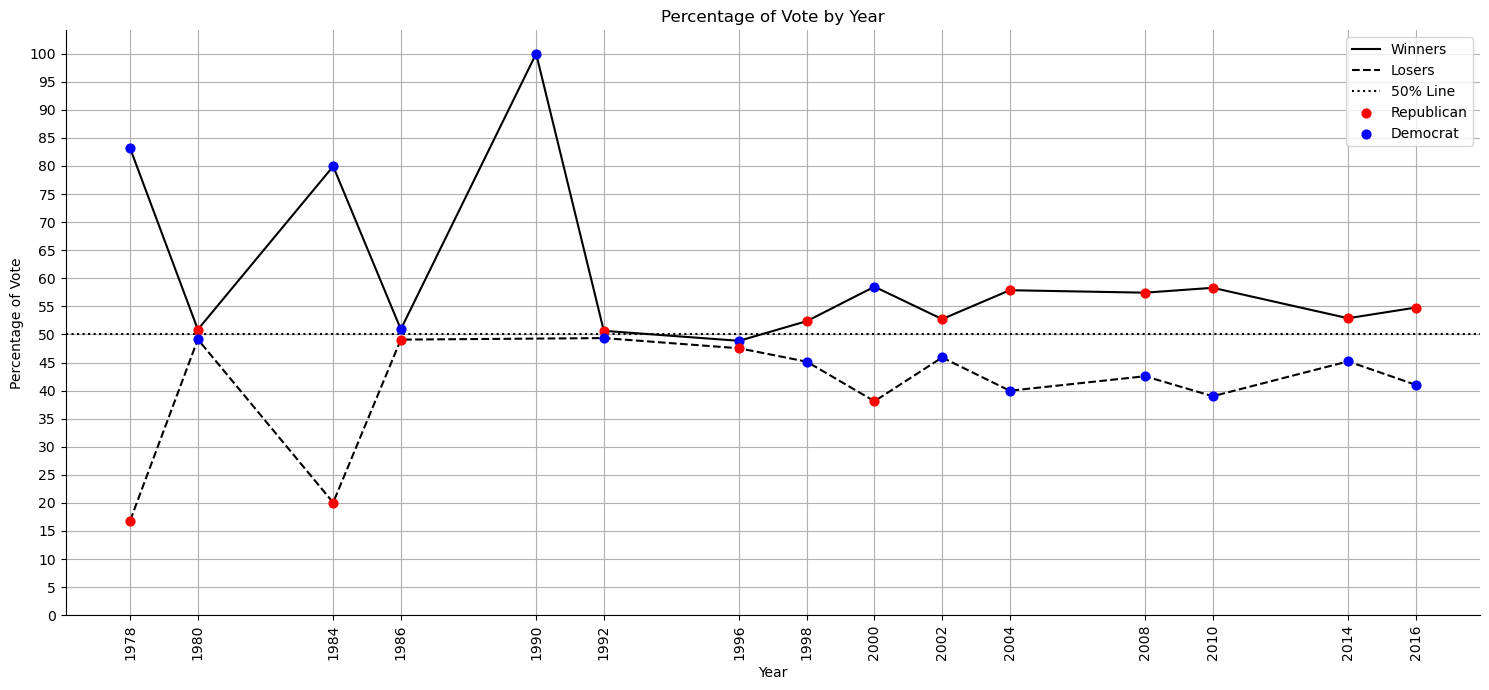

In [166]:
# Separate data for winners and losers
winners = GAdf_no2021[GAdf_no2021['is_winner'] == True]
losers = GAdf_no2021[GAdf_no2021['is_winner'] == False]

# Plotting the graph with larger points and lines behind
plt.figure(figsize=(15, 7))

# Plotting lines for winners and losers with different linestyles
plt.plot(winners['year'], winners['pct_of_vote'], linestyle='-', color='black', zorder=2, label='Winners')
plt.plot(losers['year'], losers['pct_of_vote'], linestyle='--', color='black', zorder=2, label='Losers')

# Plotting the black dot-dash line at y=50
plt.axhline(y=50, color='black', linestyle=':', zorder=2, label='50% Line')

# Plot points for Republicans in red and Democrats in blue with larger size (s=80)
plt.scatter(winners[winners['party_simplified'] == 'REPUBLICAN']['year'], 
            winners[winners['party_simplified'] == 'REPUBLICAN']['pct_of_vote'], 
            color='red', label='Republican', s=40, zorder=3)
plt.scatter(winners[winners['party_simplified'] == 'DEMOCRAT']['year'], 
            winners[winners['party_simplified'] == 'DEMOCRAT']['pct_of_vote'], 
            color='blue', label='Democrat', s=40, zorder=3)
plt.scatter(losers[losers['party_simplified'] == 'REPUBLICAN']['year'], 
            losers[losers['party_simplified'] == 'REPUBLICAN']['pct_of_vote'], 
            color='red', s=40, zorder=3)
plt.scatter(losers[losers['party_simplified'] == 'DEMOCRAT']['year'], 
            losers[losers['party_simplified'] == 'DEMOCRAT']['pct_of_vote'], 
            color='blue', s=40, zorder=3)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Vote')
plt.title('Percentage of Vote by Year')

# Show legend
plt.legend()

# Setting y-axis ticks to count by 5s
plt.yticks(range(0, 101, 5))

# Evenly space the x-axis
plt.xticks(GAdf_no2021['year'].unique(), rotation='vertical')

# Enable grid and set it behind everything (zorder=0)
plt.grid(True, zorder=0)

# Evenly space the x-axis
plt.tight_layout()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

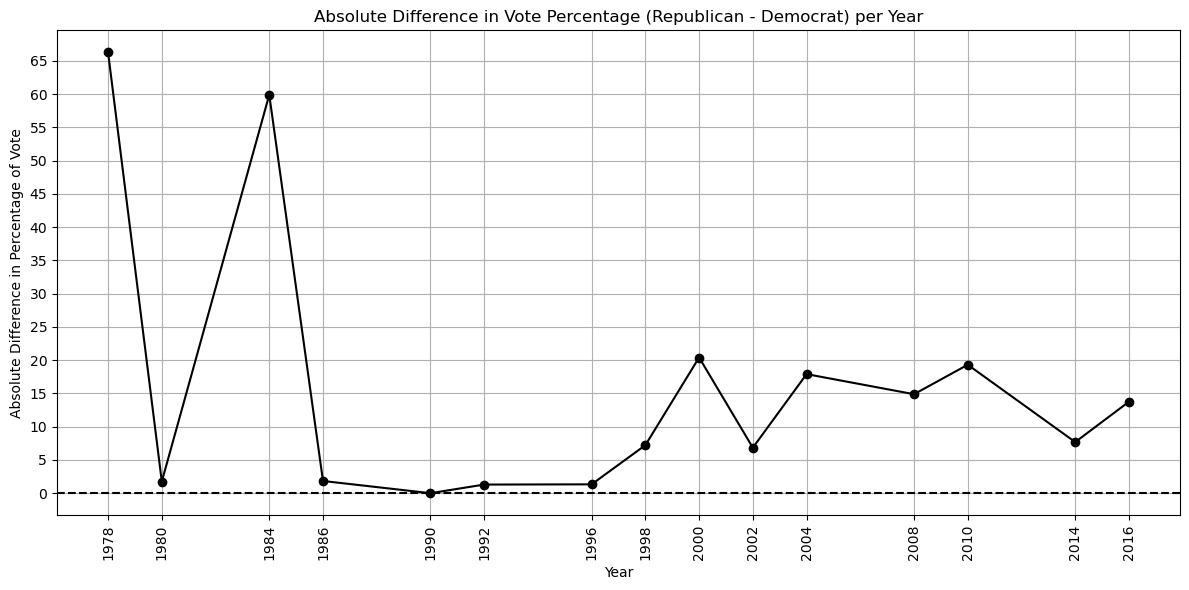

In [156]:
# Calculate the absolute difference between Republican and Democrat percentages for each year
diff_per_year = GAdf_no2021.pivot_table(index='year', columns='party_simplified', values='pct_of_vote', aggfunc='first')
diff_per_year['Absolute Difference'] = abs(diff_per_year['REPUBLICAN'] - diff_per_year['DEMOCRAT'])

# Inserting a point at 0 for 1990
diff_per_year.loc[1990] = 0

# Sorting the index to maintain the correct order
diff_per_year = diff_per_year.sort_index()

# Plotting the absolute difference graph with a black line
plt.figure(figsize=(12, 6))

# Plotting the absolute difference between Republican and Democrat percentages per year with a black line
plt.plot(diff_per_year.index, diff_per_year['Absolute Difference'], marker='o', linestyle='-', color='black')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Absolute Difference in Percentage of Vote')
plt.title('Absolute Difference in Vote Percentage (Republican - Democrat) per Year')

# Set y-axis ticks to count by 5
plt.yticks(range(0, int(diff_per_year['Absolute Difference'].max()) + 1, 5))

# Plot a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Evenly space the x-axis
plt.xticks(diff_per_year.index, rotation='vertical')

# Enable grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()